<a href="https://colab.research.google.com/github/HyeongJun02/BaekJoon/blob/main/%5BML%5D_%5B24_10_08%5D_02_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 패키지 선언

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dataset
import torchvision.transforms as transform
from torch.utils.data import DataLoader

## Dataset 선언

In [ ]:
# Training dataset 다운로드
mnist_train = dataset.MNIST(root = "./", # 데이터셋을 저장할 위치
                            train = True,
                            transform = transform.ToTensor(),
                            download = True)
# Testing dataset 다운로드
mnist_test = dataset.MNIST(root = "./",
                            train = False,
                            transform = transform.ToTensor(),
                            download = True)

## MNIST 데이터셋 형상 확인

60000
torch.Size([1, 28, 28])
5


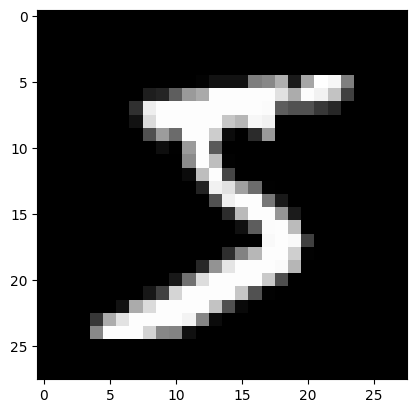

In [ ]:
import matplotlib.pyplot as plt
print(len(mnist_train))     # training dataset 개수 확인

first_data = mnist_train[0]
print(first_data[0].shape)  # 첫번째 data의 형상 확인
print(first_data[1])        # 첫번째 data의 정답 확인

plt.imshow(first_data[0][0,:,:], cmap='gray')
plt.show()

In [ ]:
first_img = first_data[0]
print(first_img.shape)

first_img = first_img.view(-1, 28*28) # 이미지 평탄화 수행 2D -> 1D
print(first_img.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


## Multi Layer Perceptron 모델 정의

In [ ]:
class MLP (nn.Module):
  def __init__ (self):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(in_features=784, out_features=100)
    self.fc2 = nn.Linear(in_features=100, out_features=10)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = x.view(-1, 28*28)
    y = self.sigmoid(self.fc1(x))
    y = self.fc2(y)
    return y

## Hyper-parameters 지정

In [ ]:
batch_size = 100
learning_rate = 0.1
training_epochs = 15
loss_function = nn.CrossEntropyLoss()
network = MLP()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

## Perceptron 학습을 위한 반복문 선언

In [ ]:
network = network.to('cuda:0')
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:

    img = img.to('cuda:0')
    label = label.to('cuda:0')

    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad() # gradient 초기화
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch+1, avg_cost))

print('Learning finished')

Epoch: 1 Loss = 1.150938
Epoch: 2 Loss = 0.446179
Epoch: 3 Loss = 0.359760
Epoch: 4 Loss = 0.323370
Epoch: 5 Loss = 0.301021
Epoch: 6 Loss = 0.283951
Epoch: 7 Loss = 0.269888
Epoch: 8 Loss = 0.257492
Epoch: 9 Loss = 0.246509
Epoch: 10 Loss = 0.236325
Epoch: 11 Loss = 0.226857
Epoch: 12 Loss = 0.217887
Epoch: 13 Loss = 0.210007
Epoch: 14 Loss = 0.202335
Epoch: 15 Loss = 0.195260
Learning finished


## 학습이 완료된 모델을 이용해 정답률 확인

In [ ]:
network = network.to('cpu')
with torch.no_grad(): # test에서는 기울기 계산 제외

  img_test = mnist_test.data.float()
  label_test = mnist_test.targets

  prediction = network(img_test) # 전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.9391999840736389


## Weight parameter 저장하기/불러오기

In [ ]:
torch.save(network.state_dict(), "./mlp_mnist.pth")